### Contiki Dataset Multiclass Classification - CIIC Research - José P. Areia

**The table below represents all the fields of the dataset as well as their descriptions and the encoding process done in each one of the fields.**

Type of pre-processing / data encoding done: <mark>Categorical Values (Dummies)</mark>, <mark>Z-Score Normalization</mark>, <mark>Empty Cells Filling</mark>, and <mark>Value Replacing.</mark>

It's important to notice that the fields **attack_type** and **is_malicious** were later added to the dataset in order to distinguish normal traffic from the malicious one, and to identify what type of attack was done. The list below represents a numerical classification represented in the field **attack_type**.

- \[0\] - Normal
- \[1\] - Black Hole
- \[2\] - Hello Flood
- \[3\] - Version Number


| Field | Description | Deleted | Categorical Values (Dummies) | Z-Score Normalization | Empty Cells Filling |
|:---|:---|:---:|:---:|:---:|:---:|
| ipv6.src | Source address | &#x2714; | - | - | - |
| udp.dstport | Destination port | &#x2714; | - | - | - |
| frame.protocols | Protocols in frame | &#x2714; | - | - | - |
| coap.payload_length | Payload | - | &#x2714; | - | - |
| udp.srcport | Source port | &#x2714; | - | - | - |
| udp.length | UDP Frame length | - | - | &#x2714; | &#x2714; |
| wpan.dst64 | Destination (EUI64 Destination) | &#x2714; | - | - | - |
| icmpv6.rpl.dio.version | DIO Version | - | - | &#x2714; | &#x2714; |
| wpan.dst_addr_mode | Destination addressing mode | &#x2714; | - | - | - |
| icmpv6.rpl.dio.rank | DIO Rank | - | - | &#x2714; | &#x2714; |
| **is_malicious**\* | Distinguish normal from malicious traffic | - | - | - | - |
| coap.type | Type | - | - | - | &#x2714; |
| ipv6.dst | Destination address | &#x2714; | - | - | - |
| ipv6.plen | Payload length | - | - | &#x2714; | &#x2714; |
| frame.len | Frame length on the wire | &#x2714; | - | - | - |
| **attack_type**\* | Type of attack | - | - | - | - |
| ipv6.nxt | Next header | - | &#x2714; | - | - |
| wpan.src64 | Extended source | &#x2714; | - | - | - |
| icmpv6.code | ICMPv6 Code - [IANA Table Code](https://www.iana.org/assignments/icmpv6-parameters/icmpv6-parameters.xhtml#icmpv6-parameters-3)  | &#x2714; | - | - | - |
| 6lowpan.src | Source | &#x2714; | - | - | - |
| coap.code | Coap code [RFC 7252](https://www.rfc-editor.org/rfc/rfc7252#page-86) | - | &#x2714; | - | - |
| icmpv6.rpl.dio.dtsn | Destination advertisement trigger sequence number (DTSN) | - | - | &#x2714; | &#x2714; |
| 6lowpan.dst | Destination | &#x2714; | - | - | - |
| 6lowpan.next | Next header | &#x2714; | - | - | - |
| icmpv6.rpl.dao.dodagid | DODAGID | &#x2714; | - | - | - |
| mqtt.conflag.willflag | Will Flag | &#x2714; | - | - | - |
| mqtt.conflags | Connect Flags | &#x2714; | - | - | - |
| mqtt.len | Message Length | &#x2714; | - | - | - |
| mqtt.msg | Message | &#x2714; | - | - | - |
| mqtt.qos | Quality of Service Number | &#x2714; | - | - | - |
| mqtt.topic | Message Topic | &#x2714; | - | - | - |
| tcp.dstport | Destination Port | &#x2714; | - | - | - |
| tcp.flags | Flags | &#x2714; | - | - | - |
| tcp.len | Length | - | - | &#x2714; | &#x2714; |
| tcp.nxtseq | Next Sequence Number | - | - | &#x2714; | &#x2714; |
| tcp.srcport | Source Port | &#x2714; | - | - | - |
| wpan.src_addr_mode | Source Addressing Mode | &#x2714; | - | - | - |
| wpan.version | Frame Version | - | &#x2714; | - | - |

In [1]:
# Tensorflow logging: OFF
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

**The next blocks of code are for defining the methods used for the pre-processing and data encoding.**

The methods are the following: <mark>read_data</mark>, <mark>delete_fields</mark>, <mark>fill_empty_cells</mark>, <mark>zscore_fields_normalization</mark>, <mark>coap_payload_length</mark>, <mark>dummy_encode</mark>, and <mark>value_replacing</mark>. More details in the blocks of code below.

In [2]:
# Pre-processing & Data Encoding
import pandas as pd

# Import dataset
def read_data(dataset):
    df = pd.read_csv(dataset)
    print(f'[DONE] Imported Dataset')
    return df

In [ ]:
# Delete Unnecessary Fields
def delete_fields(df, fields):
    for i in fields:
        df.drop(i, axis = 1, inplace = True)
        
    print(f'[DONE] Fields Deleted')

In [ ]:
# Fill Empty Cells With N Value
def fill_empty_cells(df, fields, n):
    for i in fields:
        df[i] = df[i].fillna(n)
    
    print(f'[DONE] Empty Cells Filling')

In [ ]:
from scipy.stats import zscore

# Z-Score Normalization
def zscore_normalization(df, fields):
    for i in fields:
        df[i] = zscore(df[i])

    print(f'[DONE] Z-Score Normalization')

In [ ]:
# Replace old value for a new one 
def value_replacing(df, field, old_value, new_value):
    df[field] = df[field].replace(old_value, new_value)

    print(f'[DONE] Value Replacing')

In [ ]:
# Convert fields to dummy variables
def dummy_encode(df, fields):
    for i in fields:
        df = pd.concat([df, pd.get_dummies(df[i], prefix = i)], axis = 1)
        df.drop(i, axis = 1, inplace = True)
    print(f'[DONE] Categorical Values (Dummies)')
    return df

In [ ]:
# Import Dataset & Read Data
df = read_data('Datasets/Contiki/Final_Dataset.csv')

The above code will reproduce an warning saying the following **"DtypeWarning: Columns (9,18,20,22,24) have mixed types"**. Since the the collumns 9, 18, 20, 22, and 24 represent the fields <mark>icmpv6.rpl.dao.dodagid</mark>, <mark>mqtt.conflags</mark>, <mark>mqtt.msg</mark>, <mark>mqtt.topic</mark>, and <mark>tcp.flags</mark> respectively, and these collumns are going to be deleted later in this notebook, there is no problem whatsoever about the warning shown.

In [ ]:
# Fields -- Deleted Fields
f_delete = [ 
    'ipv6.src', 'ipv6.dst', 'frame.protocols', 'udp.srcport', 'udp.dstport', 'icmpv6.code', '6lowpan.dst',
    '6lowpan.src', 'wpan.src64', 'wpan.dst64', '6lowpan.next', 'tcp.srcport', 'tcp.dstport', 'mqtt.qos',
    'mqtt.topic', 'mqtt.msg', 'mqtt.len', 'wpan.dst_addr_mode', 'wpan.src_addr_mode', 'frame.len',
    'icmpv6.rpl.dao.dodagid', 'mqtt.conflag.willflag', 'mqtt.conflags', 'tcp.flags', 'wpan.version'
]

delete_fields(df, f_delete)

In [ ]:
# Fields -- Empty Cells Filling
fill_0 = [
    'udp.length', 'icmpv6.rpl.dio.version', 'icmpv6.rpl.dio.rank', 'ipv6.plen', 'icmpv6.rpl.dio.dtsn',
    'tcp.len', 'tcp.nxtseq'
]

fill_1 = [
    'coap.type'
]

fill_empty_cells(df, fill_0, 0)  # Fill: 0
fill_empty_cells(df, fill_1, -1) # Fill: -1

In [ ]:
# Empty Cells Filling + Convert to Object
dummy_fields = [
    'coap.payload_length', 'ipv6.nxt', 'coap.code'
]

for i in dummy_fields:
    df[i] = df[i].fillna(0)
    df[i] = df[i].astype(str)
    
print(f'[DONE] Empty Cells Filling + Convert to Object -- Categorical Values')  

#### SMOTE-NC Application

In [ ]:
# Split dataset -- Train + Test
df_train = df.sample(frac = 0.75, random_state = 10)
df_test = df.drop(df_train.index)

print(f'[DONE] Split dataset -- Train + Test') 

In [ ]:
def apply_smotenc_bigdata(df: pd.DataFrame, label: str, categorical_indices: list = [], random_state: int = 0) -> pd.DataFrame:
    import numpy as np  
    from imblearn.over_sampling import SMOTENC
    
    # Make a copy of the input dataframe and separate the target variable column
    X_resampled = df.copy()
    X_resampled = X_resampled.drop(columns=[label])
    y_resampled = df[label].copy()
    
    # Apply the SMOTENC algorithm to oversample the dataset
    print(f"Starting SMOTENC -- Size of the dataframe: {df.size} ")
    
    # Apply the SMOTENC algorithm to oversample the dataset
    smote_nc = SMOTENC(
        categorical_features = categorical_indices, 
        random_state = random_state,
        sampling_strategy = "minority"
    )

    for labels in np.unique(y_resampled):
        X_resampled, y_resampled = smote_nc.fit_resample(X_resampled, y_resampled)
    
    df_smote = pd.DataFrame(X_resampled, columns = X_resampled.columns)
    df_smote[label] = y_resampled
    
    # Print the size of the original and oversampled datasets, and return the oversampled dataset
    print(f"Finished SMOTENC -- Size of the dataframe: {df_smote.size}")
    
    return df_smote

In [ ]:
features = [ col for col in df_train.columns if col not in ["attack_type"]]
featuresIndex = []

for i in dummy_fields:
    featuresIndex.append(features.index(i))

df_train = apply_smotenc_bigdata(
    df = df_train, 
    label = "attack_type",
    categorical_indices = featuresIndex,
    random_state = 10
)

print(f'[DONE] SMOTE-NC Application')

In [ ]:
# Concat the train STOME dataframe with the test
df = pd.concat([df_train, df_test], keys = [0, 1])

#### Resuming the Data Encoding

In [ ]:
# Fields -- Z-Score Normalization
zscore_fields = [
    'udp.length', 'icmpv6.rpl.dio.version', 'icmpv6.rpl.dio.rank', 'ipv6.plen', 'icmpv6.rpl.dio.dtsn',
    'tcp.nxtseq', 'tcp.len'
]

zscore_normalization(df, zscore_fields)

In [ ]:
# Fields -- Standard Normalization (Value Replacing)
value_replacing(df, 'coap.type', 2, 1)

In [ ]:
# Fields -- Categorical Values
dummy_fields = [
    'coap.payload_length', 'ipv6.nxt', 'coap.code'
]

df = dummy_encode(df, dummy_fields)

In [ ]:
# Save the dataset
df.to_csv("Datasets/Contiki/SMOTE_Dataset.csv")

> &#x26a0; **If the SMOTE-NC was already done, you can just go from this point further.**

In [3]:
# Import Dataset & Read Data
df = read_data('Datasets/Contiki/SMOTE_Dataset.csv')

[DONE] Imported Dataset


In [4]:
# Drop the first two collumns of the dataset
df = df.drop(df.columns[[0, 1]], axis = 1)

In [5]:
df.drop('tcp.len', axis = 1, inplace = True)

In [6]:
import numpy as np

# Convert to Numpy Classification

# Classification Type: 0 - Binary / 1 - Multiclass
classification_type = 1

# For a multiclass classification, drop both 'is_malicious' and 'attack_type' collumn

# For a binary classification, use 'is_malicious' as target collumn
# For a multiclass classification, use 'attack_type' as target collumn

if (classification_type):
    x_columns = df.columns.drop(['attack_type', 'is_malicious'])
    dummies = pd.get_dummies(df['attack_type'])
else:
    x_columns = df.columns.drop(['attack_type', 'is_malicious'])
    dummies = pd.get_dummies(df['is_malicious'])
    
x = df[x_columns].values
attack = dummies.columns
y = dummies.values

print(f'[DONE] Numpy Classification')

[DONE] Numpy Classification


In [7]:
from sklearn.model_selection import train_test_split

# Training validation splitting 
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.25,
    random_state = 10
)

print(f'[DONE] Training validation splitting')

[DONE] Training validation splitting


In [8]:
import pickle as pkl

# Save training dataset
with open("Saved_Datasets/Contiki/Training_Multiclass.pkl", "wb") as f:
    pkl.dump([x_train, y_train], f)
    
# Save test dataset
with open("Saved_Datasets/Contiki/Testing_Multiclass.pkl", "wb") as f:
    pkl.dump([x_test, y_test], f)
    
print(f'[DONE] Training dataset saved')
print(f'[DONE] Testing dataset saved')

[DONE] Training dataset saved
[DONE] Testing dataset saved


#### If the dataset splited is already saved, you can go from this point furhter without running the blocks of code above.

The datasets are the following (<mark>both are saved under the directory Saved_Datasets</mark>):
- Training_Multiclass.pkl
- Testing_Multiclass.pkl

In [ ]:
import pickle as pkl

# Load training dataset 
with open("Saved_Datasets/Contiki/Training_Multiclass.pkl", "rb") as f:
    x_train, y_train = pkl.load(f)

# Load testing dataset 
with open("Saved_Datasets/Contiki/Testing_Multiclass.pkl", "rb") as f:
    x_test, y_test = pkl.load(f)

print(f'[DONE] Training dataset loaded')
print(f'[DONE] Testing dataset loaded')

In [9]:
import tensorflow.keras
from tensorflow.keras import backend as K

# Metrics for real-time usage in the model below
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Neural Network Model
model = Sequential()
model.add(Dense(50, input_dim = x.shape[1], activation = 'relu')) # Hidden 1
model.add(Dropout(0.5))
model.add(Dense(25, activation = 'relu')) # Hidden 2
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation = 'softmax')) # Output
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = [f1_m])

# Early Stopping
monitor = EarlyStopping(
    monitor = 'val_loss', 
    min_delta = 1e-3, 
    patience = 10, 
    verbose = 1, 
    mode = 'auto', 
    restore_best_weights = True
)

# Reduce On Plateau
reduce = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.5,
    patience = 10,
    verbose = 1,
    mode = 'auto',
    min_lr = 1e-5
)

# Model
model.fit(
    x_train, 
    y_train, 
    validation_data = (x_test, y_test), 
    callbacks = [reduce],
    verbose = 2,
    epochs = 200
)

# Save the model
model.save('Saved_Models/Contiki/Model_Multiclass.h5')

Epoch 1/200
66745/66745 - 86s - loss: 0.5407 - f1_m: 0.8048 - val_loss: 0.4699 - val_f1_m: 0.8346 - lr: 0.0010 - 86s/epoch - 1ms/step
Epoch 2/200
66745/66745 - 83s - loss: 0.5210 - f1_m: 0.8145 - val_loss: 0.4714 - val_f1_m: 0.8335 - lr: 0.0010 - 83s/epoch - 1ms/step
Epoch 3/200
66745/66745 - 83s - loss: 0.5223 - f1_m: 0.8131 - val_loss: 0.4708 - val_f1_m: 0.8389 - lr: 0.0010 - 83s/epoch - 1ms/step
Epoch 4/200
66745/66745 - 82s - loss: 0.5237 - f1_m: 0.8128 - val_loss: 0.4721 - val_f1_m: 0.8385 - lr: 0.0010 - 82s/epoch - 1ms/step
Epoch 5/200
66745/66745 - 82s - loss: 0.5271 - f1_m: 0.8128 - val_loss: 0.4724 - val_f1_m: 0.8388 - lr: 0.0010 - 82s/epoch - 1ms/step
Epoch 6/200
66745/66745 - 82s - loss: 0.5344 - f1_m: 0.8107 - val_loss: 0.4779 - val_f1_m: 0.8361 - lr: 0.0010 - 82s/epoch - 1ms/step
Epoch 7/200
66745/66745 - 82s - loss: 0.5348 - f1_m: 0.8119 - val_loss: 0.4738 - val_f1_m: 0.8387 - lr: 0.0010 - 82s/epoch - 1ms/step
Epoch 8/200
66745/66745 - 82s - loss: 0.5376 - f1_m: 0.8121 - 

Epoch 59/200
66745/66745 - 79s - loss: 0.5468 - f1_m: 0.8124 - val_loss: 0.4745 - val_f1_m: 0.8410 - lr: 6.2500e-05 - 79s/epoch - 1ms/step
Epoch 60/200
66745/66745 - 80s - loss: 0.5446 - f1_m: 0.8122 - val_loss: 0.4754 - val_f1_m: 0.8411 - lr: 6.2500e-05 - 80s/epoch - 1ms/step
Epoch 61/200

Epoch 61: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
66745/66745 - 79s - loss: 0.5460 - f1_m: 0.8125 - val_loss: 0.4750 - val_f1_m: 0.8408 - lr: 6.2500e-05 - 79s/epoch - 1ms/step
Epoch 62/200
66745/66745 - 79s - loss: 0.5434 - f1_m: 0.8128 - val_loss: 0.4754 - val_f1_m: 0.8410 - lr: 3.1250e-05 - 79s/epoch - 1ms/step
Epoch 63/200
66745/66745 - 79s - loss: 0.5441 - f1_m: 0.8131 - val_loss: 0.4742 - val_f1_m: 0.8410 - lr: 3.1250e-05 - 79s/epoch - 1ms/step
Epoch 64/200
66745/66745 - 79s - loss: 0.5448 - f1_m: 0.8131 - val_loss: 0.4754 - val_f1_m: 0.8412 - lr: 3.1250e-05 - 79s/epoch - 1ms/step
Epoch 65/200
66745/66745 - 80s - loss: 0.5425 - f1_m: 0.8130 - val_loss: 0.4751 - val_f1

Epoch 117/200
66745/66745 - 79s - loss: 0.5728 - f1_m: 0.8135 - val_loss: 0.4730 - val_f1_m: 0.8413 - lr: 1.0000e-05 - 79s/epoch - 1ms/step
Epoch 118/200
66745/66745 - 79s - loss: 0.5696 - f1_m: 0.8136 - val_loss: 0.4734 - val_f1_m: 0.8413 - lr: 1.0000e-05 - 79s/epoch - 1ms/step
Epoch 119/200
66745/66745 - 79s - loss: 0.5626 - f1_m: 0.8134 - val_loss: 0.4733 - val_f1_m: 0.8413 - lr: 1.0000e-05 - 79s/epoch - 1ms/step
Epoch 120/200
66745/66745 - 79s - loss: 0.5834 - f1_m: 0.8135 - val_loss: 0.4730 - val_f1_m: 0.8413 - lr: 1.0000e-05 - 79s/epoch - 1ms/step
Epoch 121/200
66745/66745 - 79s - loss: 0.5537 - f1_m: 0.8135 - val_loss: 0.4734 - val_f1_m: 0.8413 - lr: 1.0000e-05 - 79s/epoch - 1ms/step
Epoch 122/200
66745/66745 - 79s - loss: 0.5752 - f1_m: 0.8134 - val_loss: 0.4734 - val_f1_m: 0.8413 - lr: 1.0000e-05 - 79s/epoch - 1ms/step
Epoch 123/200
66745/66745 - 79s - loss: 0.5479 - f1_m: 0.8135 - val_loss: 0.4734 - val_f1_m: 0.8413 - lr: 1.0000e-05 - 79s/epoch - 1ms/step
Epoch 124/200
66745/

Epoch 176/200
66745/66745 - 79s - loss: 0.5560 - f1_m: 0.8131 - val_loss: 0.4725 - val_f1_m: 0.8414 - lr: 1.0000e-05 - 79s/epoch - 1ms/step
Epoch 177/200
66745/66745 - 80s - loss: 0.5915 - f1_m: 0.8130 - val_loss: 0.4724 - val_f1_m: 0.8414 - lr: 1.0000e-05 - 80s/epoch - 1ms/step
Epoch 178/200
66745/66745 - 80s - loss: 0.5663 - f1_m: 0.8132 - val_loss: 0.4727 - val_f1_m: 0.8413 - lr: 1.0000e-05 - 80s/epoch - 1ms/step
Epoch 179/200
66745/66745 - 80s - loss: 0.5780 - f1_m: 0.8131 - val_loss: 0.4725 - val_f1_m: 0.8414 - lr: 1.0000e-05 - 80s/epoch - 1ms/step
Epoch 180/200
66745/66745 - 80s - loss: 0.5917 - f1_m: 0.8130 - val_loss: 0.4724 - val_f1_m: 0.8414 - lr: 1.0000e-05 - 80s/epoch - 1ms/step
Epoch 181/200
66745/66745 - 80s - loss: 0.5679 - f1_m: 0.8131 - val_loss: 0.4723 - val_f1_m: 0.8414 - lr: 1.0000e-05 - 80s/epoch - 1ms/step
Epoch 182/200
66745/66745 - 80s - loss: 0.5825 - f1_m: 0.8130 - val_loss: 0.4729 - val_f1_m: 0.8415 - lr: 1.0000e-05 - 80s/epoch - 1ms/step
Epoch 183/200
66745/

In [ ]:
# Output of hyperparameters stats used in model
model.summary()

In [11]:
# Prediction
pred = model.predict(x_test)

22249/22249 [==============================] - 19s 839us/step


In [12]:
from sklearn import metrics

# Metrics for the classification
def compute_metrics(pred, y_test):
    predict_classes = np.argmax(pred, axis = 1)
    expected_classes = np.argmax(y_test, axis = 1)
    
    correct = metrics.accuracy_score(expected_classes, predict_classes)
    print(f"Accuracy: {correct}")
    
    recall = metrics.recall_score(expected_classes, predict_classes, average = 'weighted')    
    print(f"Recall: {recall}")
       
    precision = metrics.precision_score(expected_classes, predict_classes, average = 'weighted')
    print(f"Precision: {precision}")
    
    f1score = metrics.f1_score(expected_classes, predict_classes, average = 'weighted')
    print(f"F1Score: {f1score}")
    
compute_metrics(pred, y_test)

Accuracy: 0.8405565645371302
Recall: 0.8405565645371302
Precision: 0.8489297397585475
F1Score: 0.8407976587224333


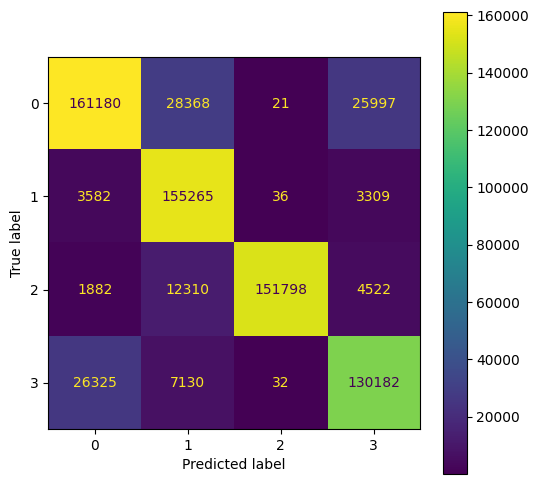

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
predict_classes = np.argmax(pred, axis = 1)
expected_classes = np.argmax(y_test, axis = 1)    
    
cm = confusion_matrix(expected_classes, predict_classes)
cmd = ConfusionMatrixDisplay(cm)

# Plot size
fig, ax = plt.subplots(figsize = (6, 6))

cmd.plot(ax = ax)

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

# Usage of ExtraTreesClassifier for feature selection
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

print(f'[DONE] Extra Trees Classifier')

[DONE] Extra Trees Classifier


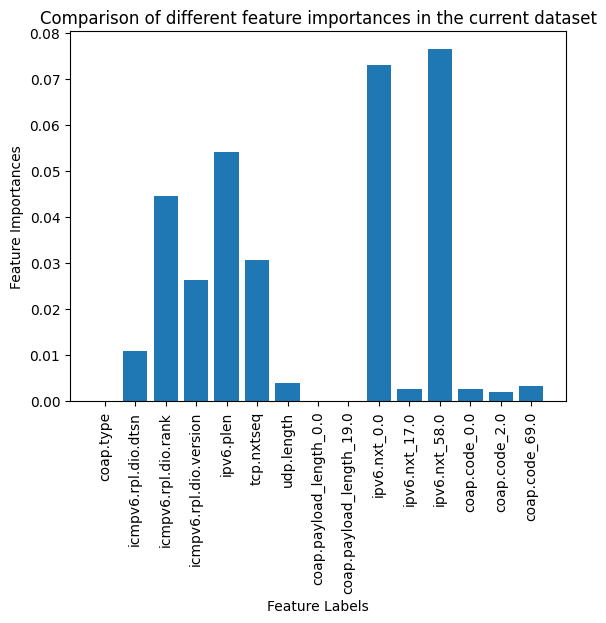

In [15]:
import matplotlib.pyplot as plot

# Plor for the ExtraTreesClassifier output
plot.bar(x_columns, feature_importance_normalized)
plot.xlabel('Feature Labels')
plot.ylabel('Feature Importances')
plot.title('Comparison of different feature importances in the current dataset')
plot.xticks(rotation = 90)

# Plot size
plot.rcParams["figure.figsize"] = (60, 40)

plot.show()